In [32]:
import numpy as np
import collections

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 120)

from gradvi.tests import toy_data
from gradvi.tests import toy_priors
from gradvi.inference import LinearRegression
from gradvi.inference import Trendfiltering
from gradvi.models import basis_matrix as gvbm
from gradvi.optimize import moving_average as gvma

from mrashpen.utils import R_trendfilter

In [33]:
ChangepointData = collections.namedtuple('CData', 
    ['x', 'y', 'ytrue'])
    #['H', 'Hinv', 'x', 'y', 'ytest', 'ytrue', 'btrue', 'bspline_bases', 'bspline_beta', 'snr'])

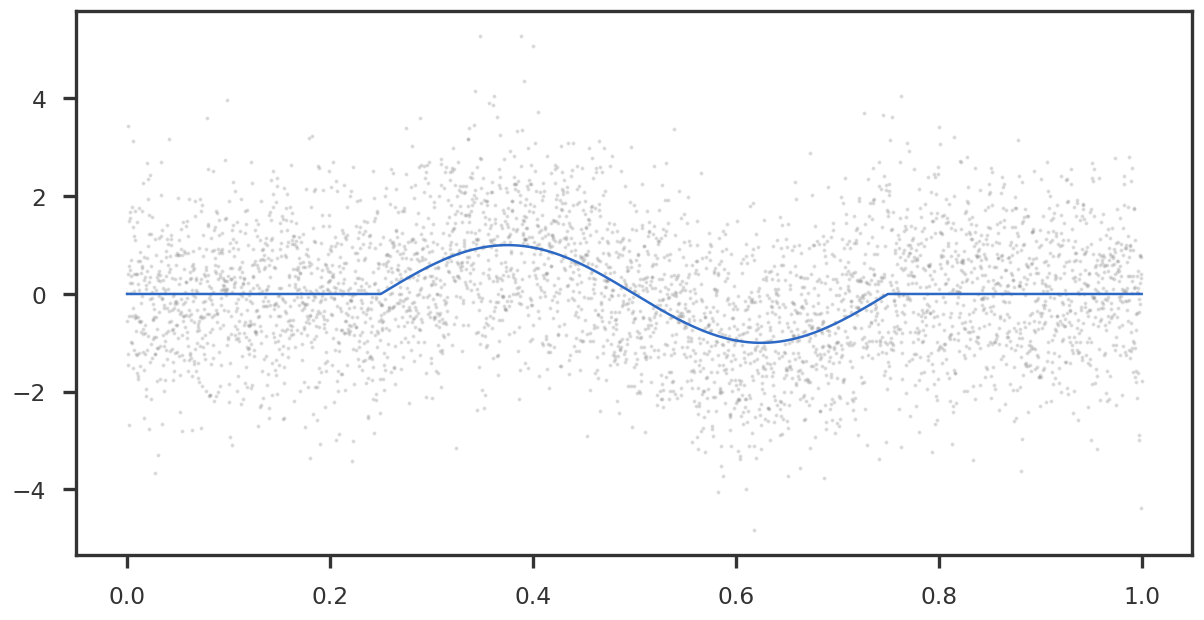

In [34]:
n = 4096
nzprop = 0.5
strue = 1.2

x = np.linspace(0, 1, n)
ytrue = np.zeros(n)
nzx0 = int((n - n * nzprop) / 2)
nzx1 = nzx0 + int(n * nzprop)
nzx  = x[nzx0:nzx1]
x0 = x[nzx0]
x1 = x[nzx1 - 1]
ytrue[nzx0:nzx1] = - np.sin(- np.pi + (nzx - x0) * (2.0 * np.pi) / (x1 - x0))

noise = np.random.normal(0, strue, size = n)
y = ytrue + noise

data = ChangepointData(x = x, y = y, ytrue = ytrue)


fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s = 2, color = 'grey', alpha = 0.2)
ax1.plot(x, ytrue)
plt.show()

In [35]:
degree = 0

In [36]:
tf_y, tf_fit = R_trendfilter.fit(data.y, order = degree)
#tf_bhat  = np.dot(data.Hinv, tf_y)

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 



In [37]:
prior_init = toy_priors.get_ash(k = 20, sparsity = None, skbase = 2.0, skfactor = 10.0)
gv1 = Trendfiltering(maxiter = 20000, standardize_basis = False, standardize = True)
gv1.fit(data.y, degree, prior_init)

In [38]:
gv2 = Trendfiltering(maxiter = 20000, standardize_basis = False, standardize = True)
gv2.fit(data.y, degree, prior_init, y_init = tf_y)

In [39]:
gv2.prior.w

array([9.98065607e-01, 1.93220676e-03, 1.52095485e-06, 2.12520778e-07,
       8.89051600e-08, 5.47571404e-08, 4.02944870e-08, 3.26341089e-08,
       2.79885062e-08, 2.49064600e-08, 2.27276985e-08, 2.11133339e-08,
       1.98732041e-08, 1.88930243e-08, 1.81002723e-08, 1.74468521e-08,
       1.68996811e-08, 1.64352953e-08, 1.60366124e-08, 1.56909131e-08])

In [40]:
gv1.prior.w

array([9.96924161e-01, 3.06483225e-03, 4.48245950e-06, 1.28371667e-06,
       7.26353149e-07, 5.27314617e-07, 4.30091638e-07, 3.73682843e-07,
       3.37237530e-07, 3.11905668e-07, 2.93347388e-07, 2.79203087e-07,
       2.68086531e-07, 2.59132764e-07, 2.51775459e-07, 2.45628931e-07,
       2.40421767e-07, 2.35957607e-07, 2.32090986e-07, 2.28711909e-07])

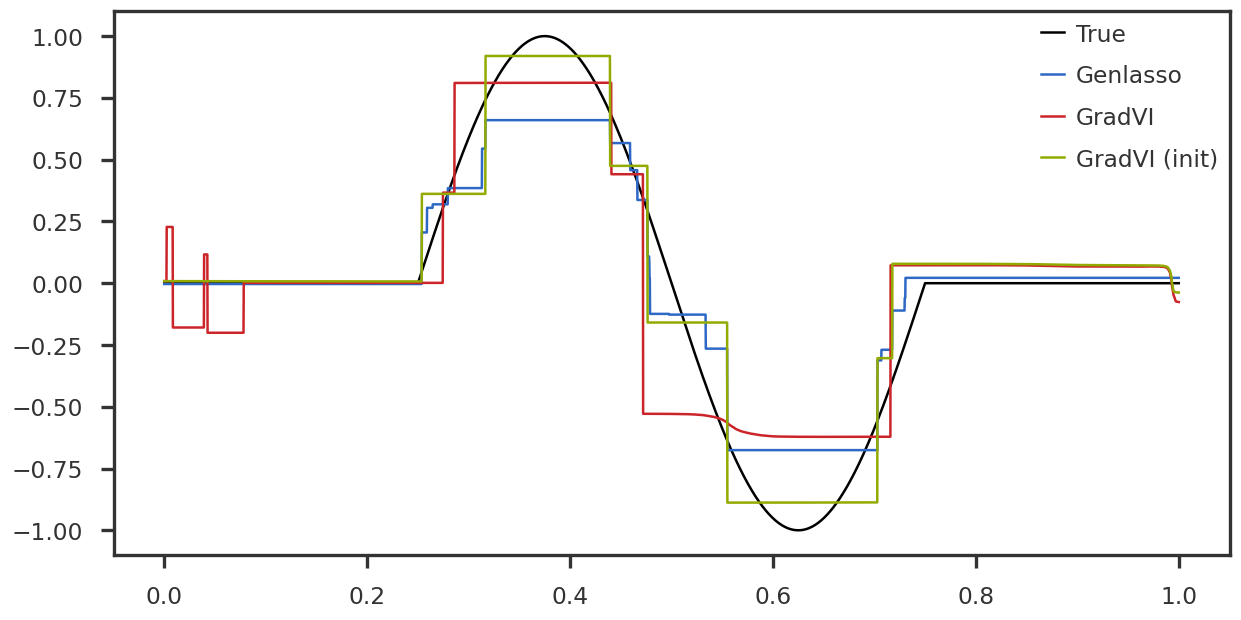

In [42]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)
#ax1.scatter(data.x, data.y, s = 2, color = 'grey', alpha = 0.1)
ax1.plot(data.x, data.ytrue, label = 'True', color = 'black')
ax1.plot(data.x, tf_y, label = 'Genlasso')
ax1.plot(data.x, gv1.ypred, label = 'GradVI')
ax1.plot(data.x, gv2.ypred, label = 'GradVI (init)')

ax1.legend()

#fig.savefig("trendfiltering_example_014.png", bbox_inches = 'tight')
plt.show()